# An Approach for Text Data Analysis

The dataset used for the text preprocessing and analysis is a twitter tweets text data. The dataset can be found at the following link:
https://data.world/crowdflower/sentiment-analysis-in-text

The dataset has 4 columns:
+ tweets id
+ sentiments
+ content
+ author

The tweets id is a unique id code and author are those who wrote those tweets in twitter. The ultimate aim is to build the sentiment analysis model so I removed these 2 columns and worked with other 2 columns 



### Importing Packages

In [1]:
import numpy as np
import pandas as pd
import string
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

from wordcloud import WordCloud, STOPWORDS

Using matplotlib backend: agg
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Load Data

In [2]:
text_data = pd.read_csv('text_dataset.csv')
text_data.head()

,sentiment,content
0,joy,Sage Act upgrade list tommorow
1,sadness,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
2,joy,eye true hazel eyeand brilliant Regular feat...
3,joy,ugh babe hugggzzz u babe naamazed nga ako e...
4,fear,Im expecting extremely important phonecall min...


In [3]:
# text data structure
text_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34791 entries, 0 to 34790
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  34791 non-null  object
 1   content    34326 non-null  object
dtypes: object(2)
memory usage: 543.7+ KB


In [4]:
#value_counts on sentiment
text_data['sentiment'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2253
disgust       856
shame         146
Name: sentiment, dtype: int64

The dataset is imbalance. The value_count gap is too high. 
+ joy class has highest no of frequency i.e 11045
+ shame has lowest no. of frequency i.e 146 

In [5]:
# Describe the data
text_data.describe(include=[object])

,sentiment,content
count,34791,34326
unique,8,30642
top,joy,“ afraid tomorrow seen yesterday love today #...
freq,11045,103


Observations:
+ In content column the unique items are 30642 but total count is 34326. So some of the text are repeated/duplicated.
+ It seems like the given text about afraid tomorrow.... is repeated maximum number of times.  

In [6]:
# The repeated text data
text_data[text_data.content=='afraid tomorrow saw yesterday love today #less']

,sentiment,content
102,fear,afraid tomorrow saw yesterday love today #less
10906,fear,afraid tomorrow saw yesterday love today #less


In [7]:
# lets see the total number of duplicated text
text_data['content'].duplicated().sum()

4148

There are around 4000 tweets which are duplicated so lets remove the duplicates.

In [8]:
# lets keep first duplicate and remove other all and also make this changes in dataframe
text_data.drop(text_data[text_data.content.duplicated(keep='first')].index, inplace=True)

In [9]:
text_data.shape

(30643, 2)

### Missing Values

In [10]:
text_data.isnull().sum()

sentiment    0
content      1
dtype: int64

In [11]:
text_data.dropna(axis=0, inplace=True)

there is no missing values but lots of raw data and noises

In [12]:
text_data['content'][0]

'Sage Act upgrade list tommorow'

While going through dataset I saw this, some of the tweets has only numbers. Lets remove it

In [13]:
# text with two or less characters in the dataset
text_data[text_data.content.str.len()<3]


,sentiment,content
539,neutral,’
578,neutral,42
1553,neutral,
1872,neutral,24
4880,joy,4
5984,neutral,6
15484,neutral,92
16090,anger,
26495,neutral,12
27861,neutral,16


In [14]:
text_data.drop(text_data[text_data.content.str.len()<3].index, inplace=True)

### Word Cloud
Word cloud is a picture of words present in particular class. The size of the words are the frequency of the words present in that class


Lets observe the word cloud of each classes to see which words are repeated at maximum

In [15]:
unique_sentiments = text_data['sentiment'].unique()
unique_sentiments

array(['joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'neutral',
       'disgust'], dtype=object)

In [16]:
neutral = text_data[text_data['sentiment'] == 'neutral']
sadness = text_data[text_data['sentiment'] == 'sadness']
surprise = text_data[text_data['sentiment'] == 'surprise']
fear = text_data[text_data['sentiment'] == 'fear']
joy = text_data[text_data['sentiment'] == 'joy']
disgust = text_data[text_data['sentiment'] == 'disgust']
shame = text_data[text_data['sentiment'] == 'shame']
anger = text_data[text_data['sentiment'] == 'anger']

neutral words


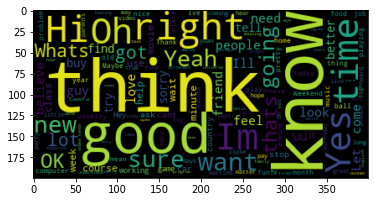

surprise words


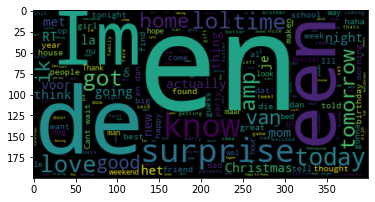

joy words


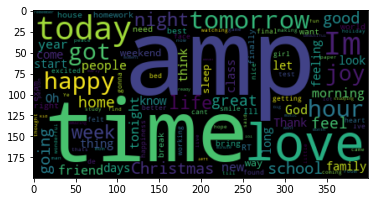

sadness words


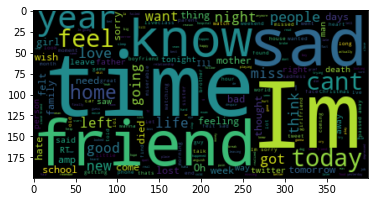

fear words


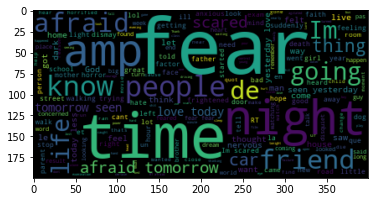

disgust words


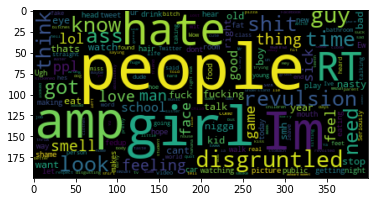

shame words


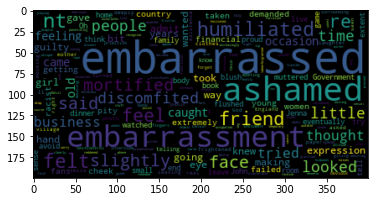

anger words


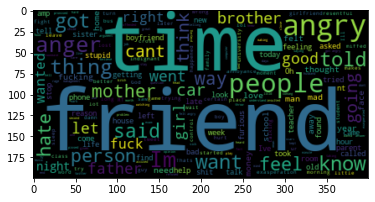

In [17]:
def wordcloud_draw(data, color = 'black'):
    # Start with one review:
    text = ' '.join(data.content)
    # Create and generate a word cloud image:
    stopwords = set(STOPWORDS)
    stopwords.update(["go", "PRON","day","work"]) 
    wordcloud = WordCloud(stopwords=stopwords).generate(text)
    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    # plt.axis("off")
    plt.show()
    

print("neutral words")
wordcloud_draw(neutral)
print("surprise words")
wordcloud_draw(surprise)
print("joy words")
wordcloud_draw(joy)
print("sadness words")
wordcloud_draw(sadness)
print("fear words")
wordcloud_draw(fear)
print("disgust words")
wordcloud_draw(disgust)
print("shame words")
wordcloud_draw(shame)
print("anger words")
wordcloud_draw(anger)

### Data Pre-processing

The text is extracted from twitter tweets and the data has lot of stopwords, user calling @ and some other symbols and characters. This things do not contribute in analyzing the sentiment of the text. so lets remove it.


we remove all the prepositions, articles, punctuation marks, stop words, leaving only the important words in the sentences.

In [18]:
def text_preprocess(text):
  ''' function: to clean the noises from the text data and preprocess the data

        parameters:
        df text column

        return:
        cleaned df column
  '''
  # convert all words into lowercase
  text = text.str.lower()

  # Single character removal
  text = text.str.replace("\s+[a-zA-Z]\s+", ' ')

  # Removing multiple spaces
  text = text.str.replace('\s+', ' ')

  # some of the common words that are present in all classes. 
  text = text.str.replace('go|PRON|day|work|&quot|good',' ')

  #remove the user tagging with @
  text = text.str.replace('@[^\s]+',' ')

  #remove the punctuation and grammatical syntax from the text
  text = text.str.replace('[?|!|\'|\[|\]|"|#|=]',' ')
  text = text.str.replace('[.|,|)|(|\|/]',' ')

  #remove the  stopwords fromthe text
  text = text.apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

  return text

The function deals with cleaning 
+ single characters
+ multiple spaces
+ user tagging @
+ punctuation and grammatical syntax
+ some of the common words that are heavily present in all classes like go, PRON, day, work. These words are of no use so I remove them

In [19]:
text_data['content'] = text_preprocess(text_data['content'])

In [20]:
text_data['content'][0]

'sage act upgrade list tommorow'

The data looks pretty good now. Lets also do lemmatization to converts word to their original form

### Lemmatization

 Lemmatization removes the grammar tense and transforms each word into its original form. Another way of converting words to its original form is called stemming. While stemming takes the linguistic root of a word, lemmatization is taking a word into its original lemma.

I am using Spacy instead of NLTK  as it  uses the latest and best algorithms, its performance is usually good as compared to NLTK. 

In [21]:
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])


In [22]:
def lemmatize_text(text):
    document = nlp(text)
    return " ".join([token.lemma_ for token in document])

In [23]:
text_data['cleaned_content'] = text_data['content'].apply(lemmatize_text)

In [24]:
text_data.shape

(30631, 3)

In [25]:
text_data = text_data.drop(['content'], axis=1)


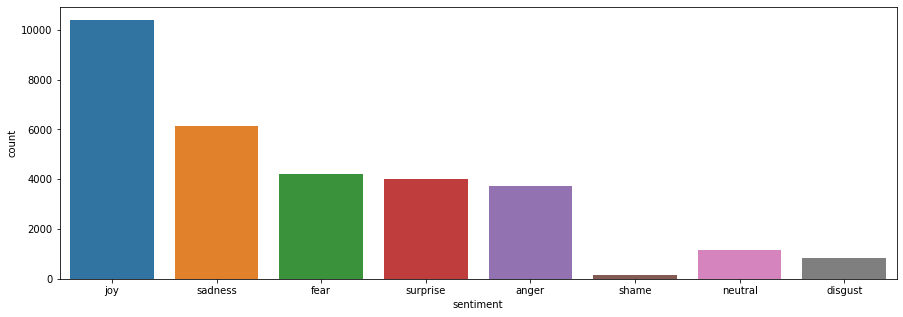

In [26]:
# Plot
plt.figure(figsize=(15,5))
sns.countplot(x='sentiment',data=text_data)
plt.show()

Observations:
+ The text data is unbalanced. It has higher number of joy and but very few shame and disgust.
+ Some of the classes like shame and anger share lots of common words so we are merging into single class

In [27]:
text_data['sentiment'].replace({'anger':'shame', }, inplace=True)

In [28]:
text_data['sentiment'].unique()

array(['joy', 'sadness', 'fear', 'surprise', 'shame', 'neutral',
       'disgust'], dtype=object)

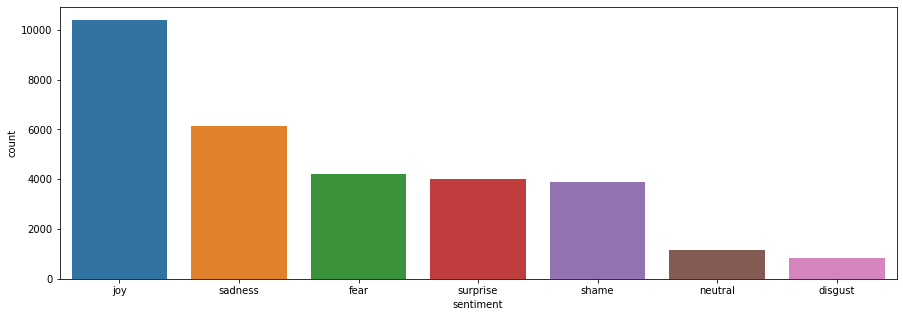

In [29]:
# Plot
plt.figure(figsize=(15,5))
sns.countplot(x='sentiment',data=text_data)
plt.savefig('barplot.jpg')
plt.show()

Now the data looks a bit better.

80


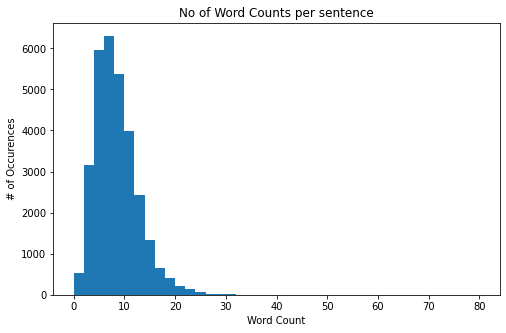

In [30]:
# compute no. of words in each text
word_cnt = [len(sentence.split()) for sentence in text_data['cleaned_content']]
print(max(word_cnt))
# Plot the distribution
plt.figure(figsize=[8,5])
plt.hist(word_cnt, bins = 40)
plt.xlabel('Word Count')
plt.ylabel('# of Occurences')
plt.title("No of Word Counts per sentence")
# plt.savefig('no')
plt.show()

In [31]:
text_data.head()

,sentiment,cleaned_content
0,joy,sage act upgrade list tommorow
1,sadness,way homegirl baby funeral man hate funeral sho...
2,joy,eye true hazel eyeand brilliant regular featur...
3,joy,ugh babe hugggzzz babe naamaze nga ako babe de...
4,fear,-PRON- be expect extremely important phonecall...


The dataset looks good. Now we can build a ML model

### Saving the cleaned dataset

In [32]:
text_data.to_csv('cleaned_data.csv',index = False)